In [55]:
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import os
import astropy
from astropy.io import fits
import astropy.constants as const
import astropy.units as u
import sunpy
import sunpy.map
from astropy.visualization import ImageNormalize, AsinhStretch
from numpy.polynomial import Polynomial

In [2]:
saffron_dirs = sorted(glob('../../src/SPICE/slimane/solo*'))

In [3]:
def plot_all_fits(main_dirs, npix_con=3, norm=None, line_name='770.42-ne_8',
                  param ='int', cmap=None):
    
    fig = plt.figure(figsize=(10,6),layout='constrained')

    for ii, dir in enumerate(main_dirs):
        glob_filename = os.path.join(dir, f'con-{npix_con:02d}', f'*{line_name}*.fits')
        filename = sorted(glob(glob_filename))[0]

        saffron_map_all = sunpy.map.Map(filename)

        if param == 'int':
            saffron_map = saffron_map_all[0]

            if norm is not None:
                saffron_map.plot_settings['norm'] = norm
            else:
                saffron_map.plot_settings['norm'] = \
                    ImageNormalize(vmin=np.nanpercentile(saffron_map.data,1),
                                    vmax=np.nanpercentile(saffron_map.data,99.5),
                                    stretch=AsinhStretch(0.1))
            if cmap is not None:
                saffron_map.plot_settings['cmap'] = cmap
            else:
                saffron_map.plot_settings['cmap'] = 'plasma'

        elif param == 'vel':
            saffron_map = saffron_map[1]

            saffron_map_data = saffron_map.data.copy()
            saffron_map_data  = (saffron_map_data/np.nanmedian(saffron_map_data) - 1)*const.c.to_value(u.km/u.s)
            saffron_map_data = saffron_map_data - np.nanmedian(saffron_map_data[120:699,:], axis=0)
            saffron_map = sunpy.map.Map(saffron_map_data, saffron_map.meta)

            
            if norm is not None:
                saffron_map.plot_settings['norm'] = norm
            else:
                saffron_map.plot_settings['norm'] = \
                ImageNormalize(vmin=-50, vmax=50)

            if cmap is not None:
                saffron_map.plot_settings['cmap'] = cmap 
            else:
                saffron_map.plot_settings['cmap'] = 'coolwarm'           

        else:
            return None

        saffron_map.meta['rsun_ref'] = 696000000.0
        saffron_map.plot_settings['aspect'] = saffron_map.scale.axis2/saffron_map.scale.axis1


    
        ax = fig.add_subplot(2, 3, ii+1, projection=saffron_map)
        saffron_map.plot(axes=ax)

        if ii != 3:
            ax.set_xlabel(' ')
            ax.set_ylabel(' ')

    
    return None

            


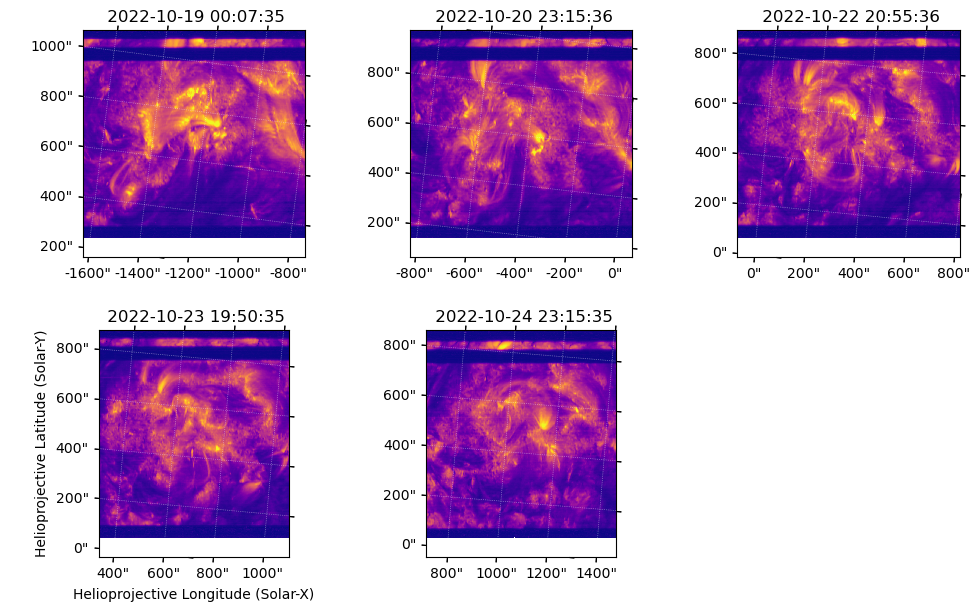

In [4]:
plot_all_fits(saffron_dirs, norm=ImageNormalize(vmin=0,vmax=5,stretch=AsinhStretch(0.05)),
              param='int')

In [5]:
a = 'good'
f'{a}ff'

'goodff'

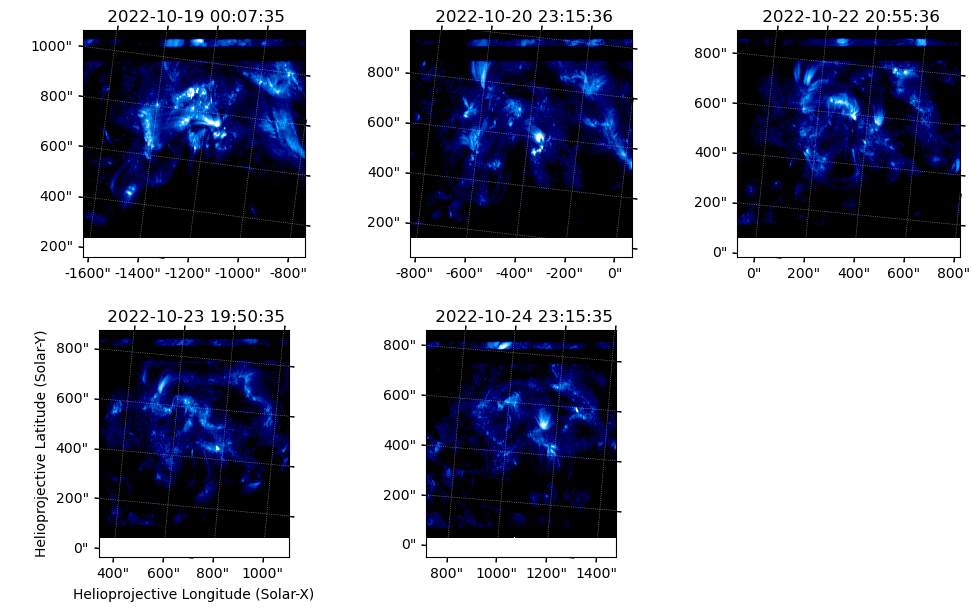

In [6]:
fig = plt.figure(figsize=(10,6),layout='constrained')

for ii, saffron_dir in enumerate(saffron_dirs):
    glob_filename = os.path.join(saffron_dir, 'con-03/*ne_8*.fits')
    filename = sorted(glob(glob_filename))[0]
    
    with fits.open(filename) as hdul:
        saffron_spice_NeVIII_map_all = sunpy.map.Map(filename)
        saffron_spice_NeVIII_int_map = saffron_spice_NeVIII_map_all[0]

        ax = fig.add_subplot(2, 3, ii+1, projection=saffron_spice_NeVIII_int_map)
        saffron_spice_NeVIII_int_map.meta["rsun_ref"] = 696000000.0
        saffron_spice_NeVIII_int_map.plot_settings['cmap'] = 'sohoeit171'
        saffron_spice_NeVIII_int_map.plot_settings['norm'] = ImageNormalize(vmin=0,vmax=5,stretch=AsinhStretch(0.05))
        saffron_spice_NeVIII_int_map.plot_settings['aspect'] = saffron_spice_NeVIII_int_map.scale.axis2/saffron_spice_NeVIII_int_map.scale.axis1

        saffron_spice_NeVIII_int_map.plot(axes=ax)

    if ii != 3:
        ax.set_xlabel(' ')
        ax.set_ylabel(' ')


In [7]:
saffron_spice_NeVIII_int_map.meta

MetaDict([('simple': 'True')
('bitpix': '-64')
('naxis': '2')
('naxis1': '192')
('naxis2': '832')
('extend': 'True')
('wcsaxes': '3')
('crpix1': '96.5')
('crpix2': '416.5')
('crpix3': '1.0')
('pc1_1': '0.996644433832')
('pc1_2': '-0.0224685795869')
('pc2_1': '0.298188520767')
('pc2_2': '0.996644433832')
('pc3_1': '-60.25')
('cdelt1': '0.0011111111111111')
('cdelt2': '0.000305')
('cdelt3': '1.0')
('cunit1': 'deg')
('cunit2': 'deg')
('cunit3': 's')
('ctype1': 'HPLN-TAN')
('ctype2': 'HPLT-TAN')
('ctype3': 'UTC')
('crval1': '0.29494045034444')
('crval2': '0.12210741052556')
('crval3': '5783.875')
('lonpole': '180.0')
('latpole': '0.12210741052556')
('cname1': 'Helioprojective longitude (Solar X), increases towards Solar West')
('cname2': 'Helioprojective latitude (Solar Y), increases towards Solar North')
('cname3': 'Time (Degenerate Dimension)')
('crder1': '0.32221302898')
('crder2': '0.2771940335')
('wcsname': 'Helioprojective-cartesian')
('timesys': 'UTC')
('dateref': '2022-10-24T23:15:

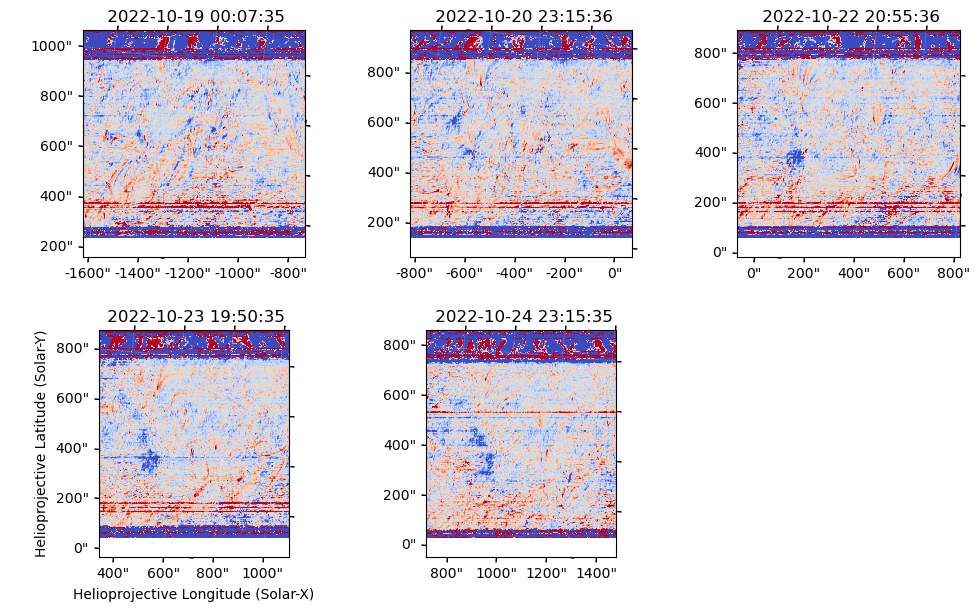

In [8]:
fig = plt.figure(figsize=(10,6),layout='constrained')

for ii, saffron_dir in enumerate(saffron_dirs):
    glob_filename = os.path.join(saffron_dir, 'con-03/*ne_8*.fits')
    filename = sorted(glob(glob_filename))[0]
    
    with fits.open(filename) as hdul:
        saffron_spice_NeVIII_map_all = sunpy.map.Map(filename)
        saffron_spice_NeVIII_vel_map_data = saffron_spice_NeVIII_map_all[1].data
        saffron_spice_NeVIII_vel_map_data = (saffron_spice_NeVIII_vel_map_data/np.nanmedian(saffron_spice_NeVIII_vel_map_data) - 1)*const.c.to_value(u.km/u.s)
        saffron_spice_NeVIII_vel_map_data = saffron_spice_NeVIII_vel_map_data - np.nanmedian(saffron_spice_NeVIII_vel_map_data[120:699,:], axis=0)
        saffron_spice_NeVIII_vel_map = sunpy.map.Map(saffron_spice_NeVIII_vel_map_data, saffron_spice_NeVIII_map_all[1].meta)

        saffron_spice_NeVIII_vel_map.meta["rsun_ref"] = 696000000.0
        saffron_spice_NeVIII_vel_map.plot_settings['cmap'] = 'coolwarm'
        saffron_spice_NeVIII_vel_map.plot_settings['norm'] = ImageNormalize(vmin=-40,vmax=40)
        saffron_spice_NeVIII_vel_map.plot_settings['aspect'] = saffron_spice_NeVIII_vel_map.scale.axis2/saffron_spice_NeVIII_vel_map.scale.axis1
    
    ax = fig.add_subplot(2, 3, ii+1, projection=saffron_spice_NeVIII_vel_map)

    saffron_spice_NeVIII_vel_map.plot(axes=ax)

    if ii != 3:
        ax.set_xlabel(' ')
        ax.set_ylabel(' ')


In [80]:
def get_int_grad_and_spurious_vel(saffron_vel_map, saffron_int_map):
    saffron_intensity_grad_x = np.gradient(saffron_int_map.data, axis=1)
    saffron_intensity_grad_y = np.gradient(saffron_int_map.data, axis=0)
    saffron_intensity_grad_x_std = np.nanstd(saffron_intensity_grad_x.flatten())
    saffron_intensity_grad_y_std = np.nanstd(saffron_intensity_grad_y.flatten())
    saffron_intensity_grad_x_greatest_mask = \
        np.where(np.abs(saffron_intensity_grad_x) > saffron_intensity_grad_x_std)
    saffron_intensity_grad_y_greatest_mask = \
    np.where(np.abs(saffron_intensity_grad_y) > saffron_intensity_grad_y_std)

    saffron_intensity_grad_x_masked = saffron_intensity_grad_x[saffron_intensity_grad_x_greatest_mask]
    saffron_intensity_grad_y_masked = saffron_intensity_grad_y[saffron_intensity_grad_y_greatest_mask]
    saffron_vel_map_masked_x = saffron_vel_map.data[saffron_intensity_grad_x_greatest_mask]
    saffron_vel_map_masked_y = saffron_vel_map.data[saffron_intensity_grad_y_greatest_mask]

    pfit_x = Polynomial.fit(saffron_intensity_grad_x_masked.flatten(),
                            saffron_vel_map_masked_x.flatten(), 1)
    pfit_y = Polynomial.fit(saffron_intensity_grad_y_masked.flatten(),
                            saffron_vel_map_masked_y.flatten(), 1)
    
    predict_spurious_velocity = pfit_x.convert().coef[1]*saffron_intensity_grad_x + \
                            pfit_y.convert().coef[1]*saffron_intensity_grad_y
    
    return saffron_intensity_grad_x, saffron_intensity_grad_y, predict_spurious_velocity



In [91]:
def plot_spice_int_and_vel(saffron_dir, ):
    glob_filename = os.path.join(saffron_dir, 'con-03/*ne_8*.fits')
    filename = sorted(glob(glob_filename))[0]



    saffron_spice_NeVIII_map_all = sunpy.map.Map(filename)
    saffron_spice_NeVIII_vel_map_data = saffron_spice_NeVIII_map_all[1].data
    saffron_spice_NeVIII_vel_map_data = (saffron_spice_NeVIII_vel_map_data/np.nanmedian(saffron_spice_NeVIII_vel_map_data) - 1)*const.c.to_value(u.km/u.s)
    saffron_spice_NeVIII_vel_map_data = saffron_spice_NeVIII_vel_map_data - np.nanmedian(saffron_spice_NeVIII_vel_map_data[120:699,:], axis=0)
    saffron_spice_NeVIII_vel_map = sunpy.map.Map(saffron_spice_NeVIII_vel_map_data, saffron_spice_NeVIII_map_all[1].meta)

    spice_ny, spice_nx = saffron_spice_NeVIII_vel_map.data.shape
    saffron_spice_NeVIII_vel_map = saffron_spice_NeVIII_vel_map.submap([0,120]*u.pix, top_right=[spice_nx, 699]*u.pix)

    saffron_spice_NeVIII_int_map = saffron_spice_NeVIII_map_all[0]
    saffron_spice_NeVIII_int_map = saffron_spice_NeVIII_int_map.submap([0,120]*u.pix, top_right=[spice_nx, 699]*u.pix)

    saffron_int_grad_x, saffron_int_grad_y, predict_spurious_velocity = \
        get_int_grad_and_spurious_vel(saffron_spice_NeVIII_vel_map, saffron_spice_NeVIII_int_map)

    saffron_spice_NeVIII_vel_map = sunpy.map.Map(saffron_spice_NeVIII_vel_map.data, saffron_spice_NeVIII_vel_map.meta,
                                                mask = np.abs(saffron_spice_NeVIII_vel_map.data) < 10)

    saffron_spice_NeVIII_int_map.meta["rsun_ref"] = 696000000.0
    saffron_spice_NeVIII_int_map.plot_settings['cmap'] = 'sdoaia171'
    saffron_spice_NeVIII_int_map.plot_settings['norm'] = ImageNormalize(vmin=np.nanpercentile(saffron_spice_NeVIII_int_map.data,0.5),
                                                                        vmax=np.nanpercentile(saffron_spice_NeVIII_int_map.data,99.5),
                                                                        stretch=AsinhStretch(0.05))
    saffron_spice_NeVIII_int_map.plot_settings['aspect'] = saffron_spice_NeVIII_int_map.scale.axis2/saffron_spice_NeVIII_int_map.scale.axis1
    
    saffron_spice_NeVIII_vel_map.meta["rsun_ref"] = 696000000.0
    saffron_spice_NeVIII_vel_map.plot_settings['cmap'] = 'coolwarm'
    saffron_spice_NeVIII_vel_map.plot_settings['norm'] = ImageNormalize(vmin=-40,vmax=40)
    saffron_spice_NeVIII_vel_map.plot_settings['aspect'] = saffron_spice_NeVIII_vel_map.scale.axis2/saffron_spice_NeVIII_vel_map.scale.axis1

    saffron_int_grad_comb = np.sqrt(saffron_int_grad_x**2 + saffron_int_grad_y**2)

    saffron_int_grad_map = sunpy.map.Map(saffron_int_grad_comb, saffron_spice_NeVIII_int_map.meta)
    saffron_int_grad_map.plot_settings['cmap'] = 'magma'
    saffron_int_grad_map.plot_settings['norm'] = ImageNormalize(vmin=np.nanpercentile(saffron_int_grad_comb,0.5),
                                                                vmax=np.nanpercentile(saffron_int_grad_comb,99.5),
                                                                stretch=AsinhStretch(0.1))
    saffron_int_grad_map.plot_settings['aspect'] = saffron_int_grad_map.scale.axis2/saffron_int_grad_map.scale.axis1

    saffron_spurious_vel_map = sunpy.map.Map(predict_spurious_velocity, saffron_spice_NeVIII_vel_map.meta)
    saffron_spurious_vel_map.plot_settings['cmap'] = 'coolwarm'
    saffron_spurious_vel_map.plot_settings['norm'] = ImageNormalize(vmin=-40,vmax=40)
    saffron_spurious_vel_map.plot_settings['aspect'] = saffron_spurious_vel_map.scale.axis2/saffron_spurious_vel_map.scale.axis1


    fig = plt.figure(figsize=(12,8),layout='constrained')
    ax1 = fig.add_subplot(221, projection=saffron_spice_NeVIII_int_map)
    im1 = saffron_spice_NeVIII_int_map.plot(axes=ax1)
    plt.colorbar(im1)
    ax1.set_xlabel(' ')
    ax1.set_ylabel(' ')


    ax2 = fig.add_subplot(222, projection=saffron_spice_NeVIII_vel_map)
    im2 = saffron_spice_NeVIII_vel_map.plot(axes=ax2)
    plt.colorbar(im2)

    ax2.set_ylabel(' ')
    ax2.set_xlabel(' ')

    ax3 = fig.add_subplot(223, projection=saffron_int_grad_map)
    im3 = saffron_int_grad_map.plot(axes=ax3)
    plt.colorbar(im3)

    ax4 = fig.add_subplot(224, projection=saffron_spurious_vel_map)
    im4 = saffron_spurious_vel_map.plot(axes=ax4)
    plt.colorbar(im4)

    ax4.set_ylabel(' ') 
    ax4.set_xlabel(' ')

    ax1.set_title('Intensity')
    ax2.set_title('Velocity')
    ax3.set_title('Intensity Gradient')
    ax4.set_title('Predicted Spurious Velocity')
    fig.suptitle(f'{saffron_spice_NeVIII_int_map.date}')

    return (ax1,ax2,ax3,ax4, predict_spurious_velocity)

    

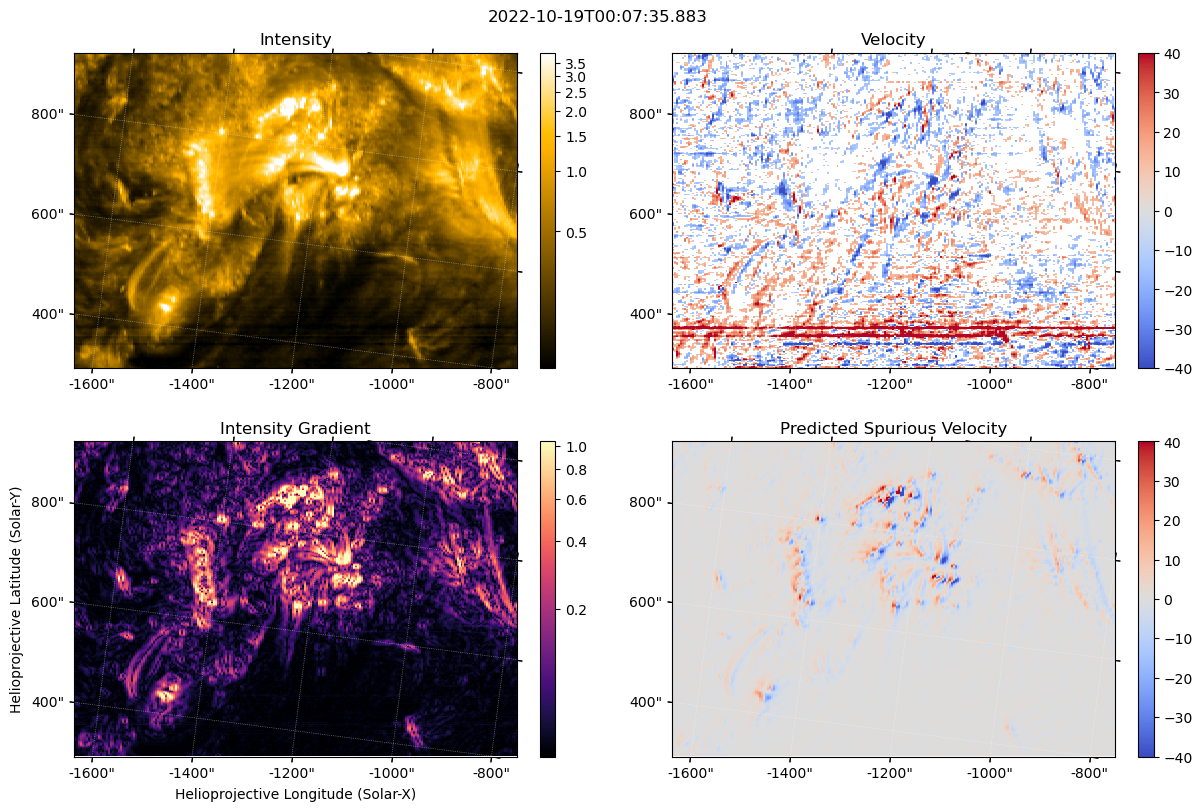

In [92]:
_  = plot_spice_int_and_vel(saffron_dirs[0])

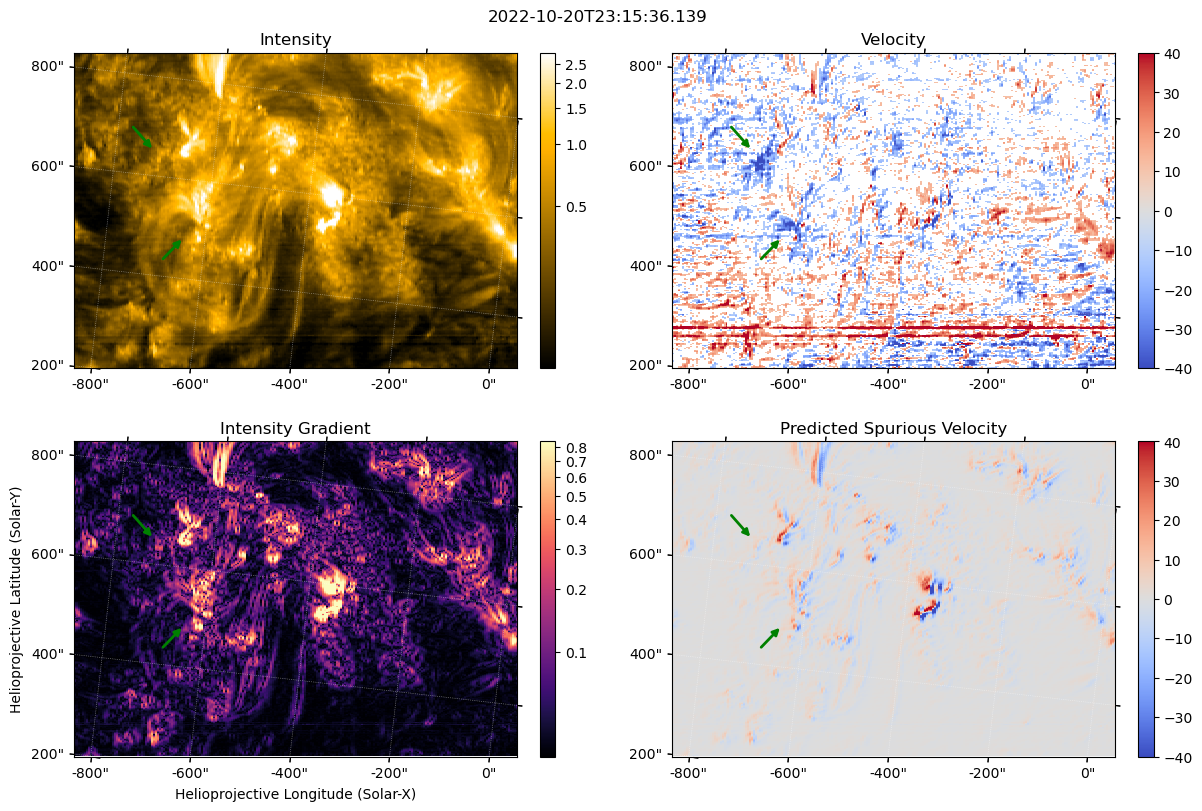

In [93]:
ax1, ax2, ax3, ax4, spurious_vel = plot_spice_int_and_vel(saffron_dirs[1])
for ax_ in (ax1, ax2, ax3, ax4):
    ax_.annotate(' ', (40,400), (25,450), arrowprops=dict(arrowstyle='-|>', color='green', lw=2))
    ax_.annotate(' ', (55,240), (40,180), arrowprops=dict(arrowstyle='-|>', color='green', lw=2))

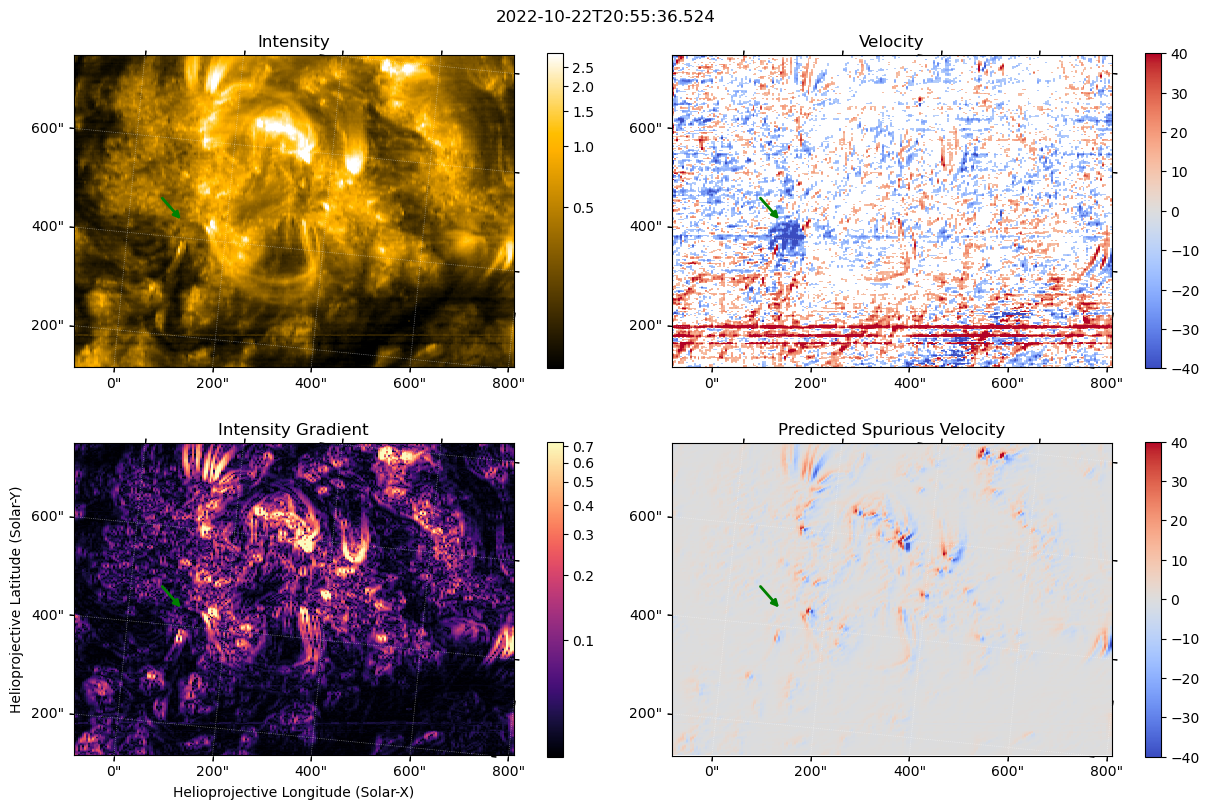

In [98]:
ax1, ax2, ax3, ax4, spurious_vel = plot_spice_int_and_vel(saffron_dirs[2])
for ax_ in (ax1, ax2, ax3, ax4):
    ax_.annotate(' ', (55,270), (40,320), arrowprops=dict(arrowstyle='-|>', color='green', lw=2))

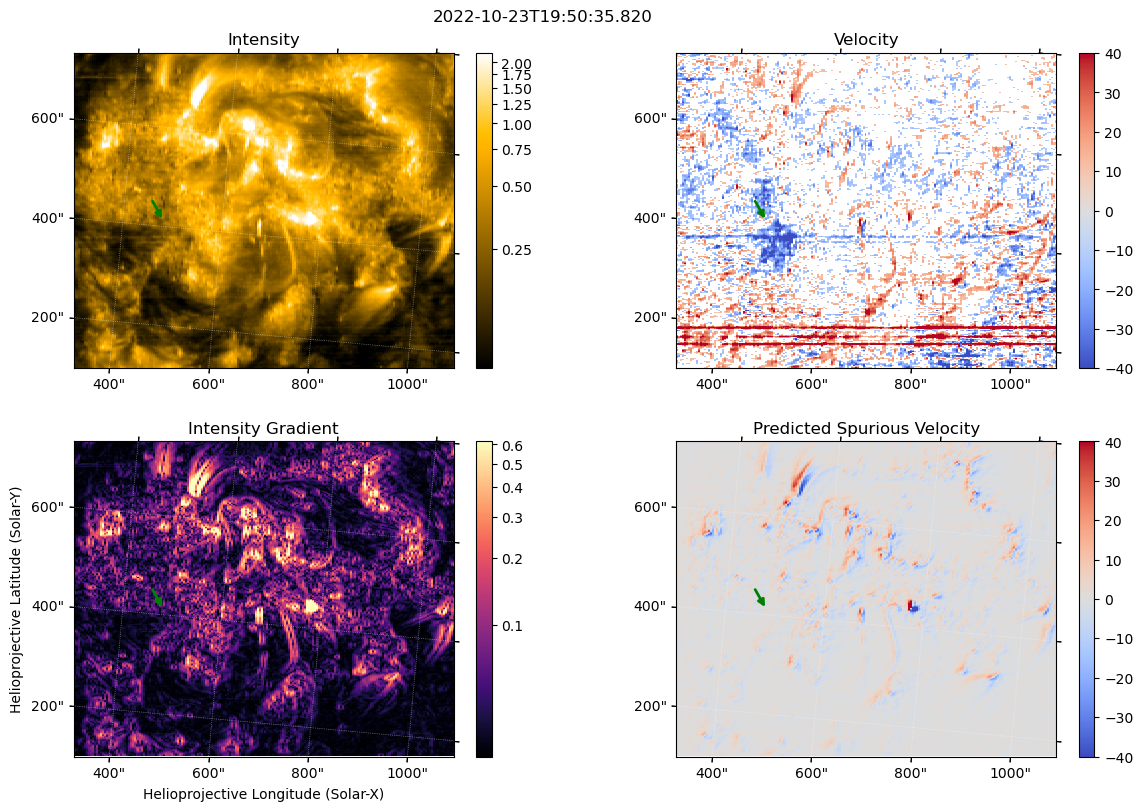

In [101]:
ax1, ax2, ax3, ax4, spurious_vel = plot_spice_int_and_vel(saffron_dirs[3])
for ax_ in (ax1, ax2, ax3, ax4):
    ax_.annotate(' ', (45,270), (35,320), arrowprops=dict(arrowstyle='-|>', color='green', lw=2))

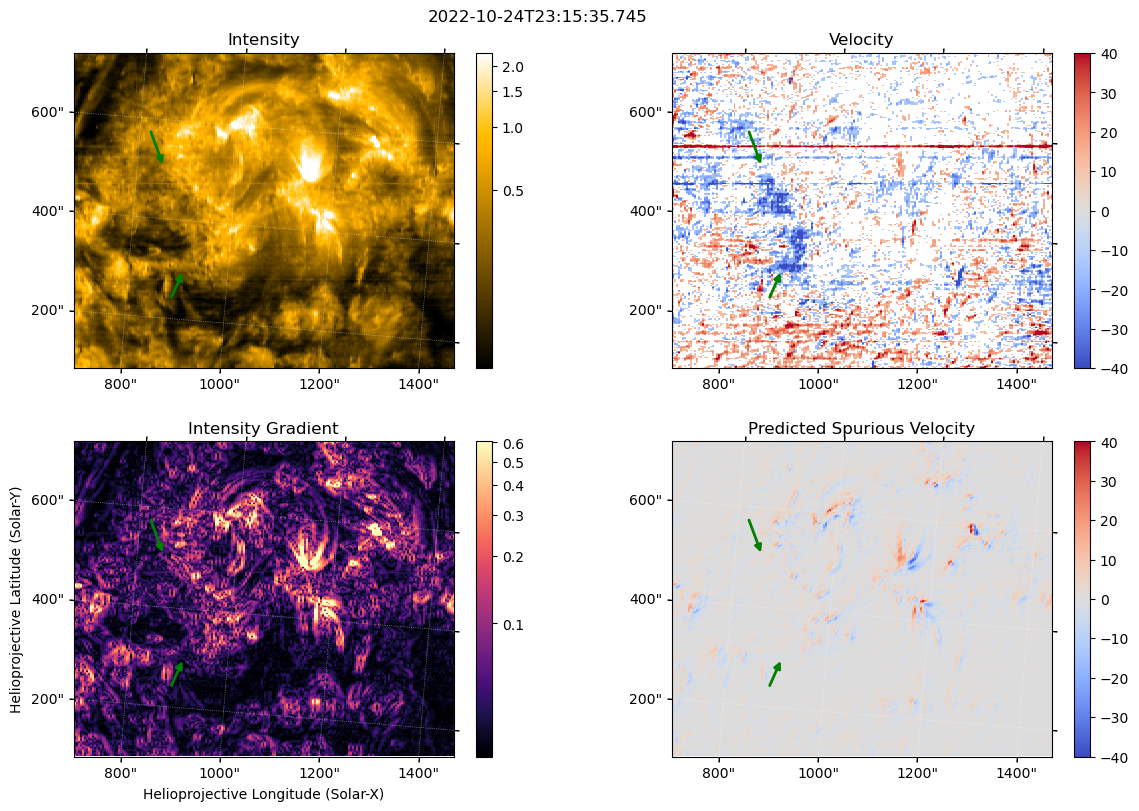

In [107]:
ax1, ax2, ax3, ax4, spurious_vel = plot_spice_int_and_vel(saffron_dirs[4])
for ax_ in (ax1, ax2, ax3, ax4):
    ax_.annotate(' ', (45,370), (35,450), arrowprops=dict(arrowstyle='-|>', color='green', lw=2))
    ax_.annotate(' ', (55,180), (45,100), arrowprops=dict(arrowstyle='-|>', color='green', lw=2))